In [1]:
from scipy.spatial import ckdtree
import numpy as np
from tqdm import tqdm as tqdm
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
l = 1
d = l*1e-2
epsilon = d*1e-3

In [21]:
N = 20 #number of vertexes
Frames = 2 #number of frames between adding vercites
M = 100 #number of segment adding iteration between adding vertices
M = int(M/Frames)

In [4]:
def random_vertex():
    x, y = np.random.random(2)*2*l-l
    return np.array([x,y])

def find_segments(vertices, segments):
    active_segments = [] #segmenty które będą się rozrastać
    segments_vertices = [] #krawędzie do których będzie rozrastać się segment na odpowiednim miejscu powyżej
    tree = ckdtree.cKDTree(segments)
    for i in range(len(vertices)-1,-1,-1):
        dist, nearest_segments = tree.query(vertices[i])
        if dist < d:
            del vertices[i]
    for i in range(len(vertices)):
        dist, nearest_segments = tree.query(vertices[i],5)
        close = [True]
        close.extend((np.diff(dist)<epsilon).tolist())
        for s in nearest_segments[close]:
            active_segments.append(segments[s])
            segments_vertices.append([i])
            
#             if s in active_segments:
# #                 index = active_segments.index(s)
# #                 segments_vertices[index].extend([i])
#                 active_segments.append(s)
#                 segments_vertices.append([i])
#             else:
#                 active_segments.append(s)
#                 segments_vertices.append([i])
    
    return active_segments, segments_vertices

(2, 2, 762)

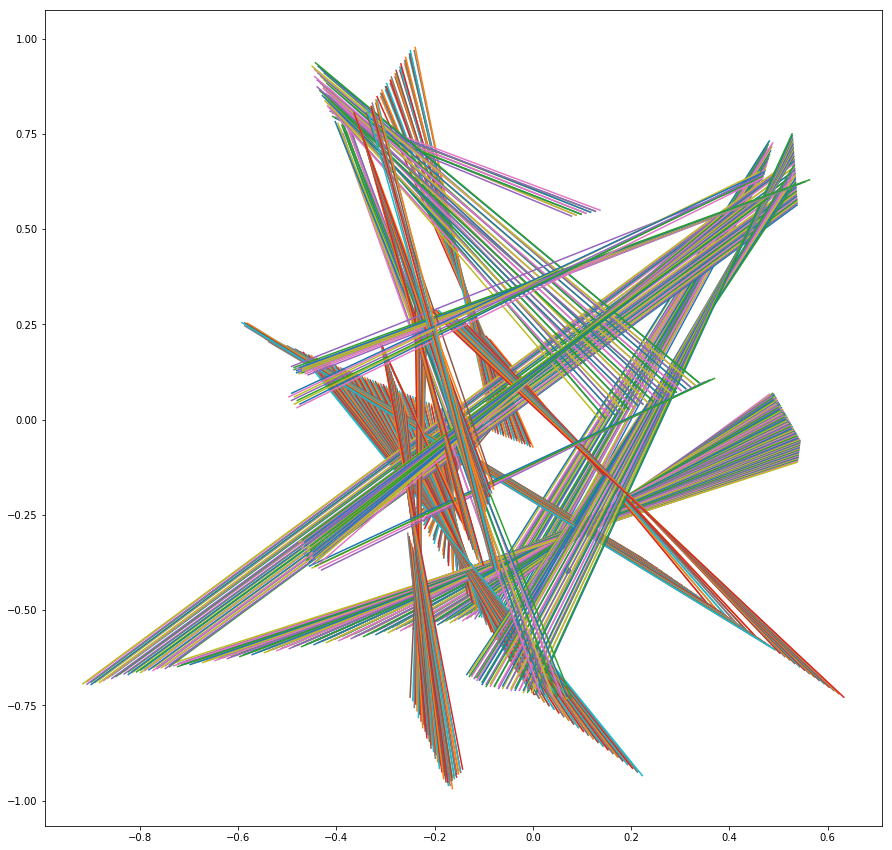

In [43]:
def animation(animation_segments,animation_vertices,save_name=None,n=Frames,interval=200):
    fig = plt.figure(figsize=[15,15])
    plots = [plt.plot(animation_segments[0].T[0],animation_segments[0].T[1]),
            plt.plot(animation_vertices[0].T[0],animation_vertices[0].T[1])]
    
    def init():
        for plot,data in zip(plots,[animation_segments,animation_vertices]):
            plot.set_data(data[0].T[0],data[0].T[1])
        return plots
    
    def update(frame):
        for plot,data in zip(plots,[animation_segments,animation_vertices]):
            plot.set_data(data[frame].T[0],data[frame].T[1])
        return plots
    
    anim = FuncAnimation(fig, update, frames=n,init_func=init,interval=interval)
    
    if save_name is None:
        pass
    else:
        anim.save(f'{save_name}.mp4')
    plt.close()
    
    
def frame(animation_segments,animation_vertices, f: int, ax=None,save_name=None):
    if ax is None:
        fig, ax = plt.subplots(figsize=[15,15])
    
    frame_segments = animation_segments[f].reshape(2, 2, len(animation_segments[f]))
    display(frame_segments.shape)
    frame_vertices = animation_vertices[f]
    scatterplot = plt.scatter(frame_vertices[:,0], frame_vertices[:,1])
#     lines = [plt.plot(segment[:, 0], segment[:, 1]) for segment in frame_segments]
    lines = plt.plot(frame_segments[0], frame_segments[1])
    return scatterplot, lines, ax
        
        
# frame(animation_segments, animation_vertices, 30);

def animation2(animation_segments,animation_vertices,save_name=None,n=Frames,interval=500):
    fig, ax = plt.subplots(figsize=[15,15])

    def update(f):
        ax.cla()
        return frame(animation_segments, animation_vertices, f, ax=ax)
        
    anim = FuncAnimation(fig, update, frames=len(animation_segments),interval=interval)
    
    if save_name is None:
        pass
    else:
        anim.save(f'{save_name}.mp4')
#     plt.close()
    return anim
    
    
from IPython.display import HTML
# HTML(animation2(animation_segments, animation_vertices).to_html5_video())

In [6]:
def run(N=N,M=M,visualization=None):
    segments = [(0,0)]
    active_vertices = []
    visual = []
    animation_vertices = []
    animation_segments = []
    for n in tqdm(range(N)):
        active_vertices.append(random_vertex())
        active_segments, segments_vertices = find_segments(active_vertices, segments)
        for f in range(Frames):
            for m in range(M):
                if (len(active_segments)-len(segments_vertices)) != 0:
                    print("alarm")
                for i in range(len(active_segments)-1, -1, -1):
                    del_x = active_vertices[segments_vertices[i][0]][0] - active_segments[i][0]
                    del_y = active_vertices[segments_vertices[i][0]][1] - active_segments[i][1]
                    r = (del_x**2 + del_y**2)**0.5
                    if r > d:
                        new_seg = (active_segments[i][0]+del_x*d/r,active_segments[i][1]+del_y*d/r)
                        segments.append(new_seg)
                        visual.append([active_segments[i],new_seg])
                        active_segments[i] = new_seg
                    else:
                        del segments_vertices[i]
                        del active_segments[i]
#                         segments_vertices.remove(segments_vertices[i])
#                         active_segments.remove(active_segments[i])
            animation_vertices.append(np.array(active_vertices.copy()))
            animation_segments.append(np.array(visual.copy()))

    active_segments, segments_vertices = find_segments(active_vertices, segments)
    animation_vertices.append(np.array(active_vertices.copy()))
    animation_segments.append(np.array(visual.copy()))

    # active_vertices = np.vstack(active_vertices).T
    segments = np.vstack(np.array(segments)).T
    if visualization == 'end_picture':
        visual = np.array(visual).T
        return visual,active_vertices
    elif visualization == 'animation':
        return [animation_segments,animation_vertices]

In [29]:
animation_segments,animation_vertices = run(N,M,visualization='animation')
visual,active_ver = run(N,M,visualization='end_picture')

  0%|          | 0/20 [00:00<?, ?it/s]/home/paulina/.anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:1273: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])
/home/paulina/.anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
100%|██████████| 20/20 [00:00<00:00, 523.14it/s]


In [127]:
# animation(animation_segments,animation_vertices,"anim")
# for i in animation_segments:
#     print(len(i))
# plt.plot(animation_vertices[0].T[0],animation_vertices.T[1],'o')
# plt.plot(animation_segments[0][0].T[0],animation_segments[0][0].T[1])
# animation_vertices
animation_segments[-1]

array([[[ 0.        ,  0.        ],
        [-0.00918712,  0.00394929]],

       [[-0.00918712,  0.00394929],
        [-0.01837423,  0.00789858]],

       [[-0.01837423,  0.00789858],
        [-0.02756135,  0.01184788]],

       ...,

       [[-0.63334127,  0.76310301],
        [-0.6239406 ,  0.75969311]],

       [[-0.6239406 ,  0.75969311],
        [-0.61453993,  0.75628321]],

       [[-0.61453993,  0.75628321],
        [-0.60513926,  0.7528733 ]]])

In [1]:
anim

ok


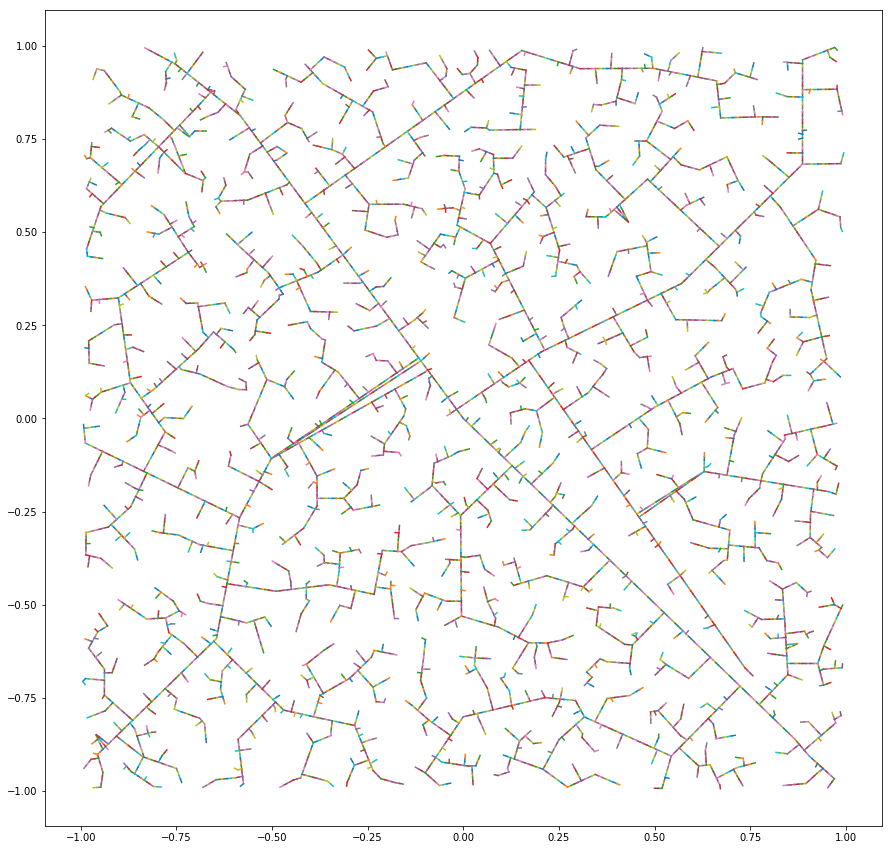

In [22]:
fig = plt.figure(figsize=[15,15])
# plt.plot(segments[0],segments[1],'.')
plt.plot(visual[0],visual[1])
if active_vertices != []:
    plt.plot(active_vertices[0],active_vertices[1],'o')
# plt.savefig("takze_tego1.png")

(2, 2, 696)


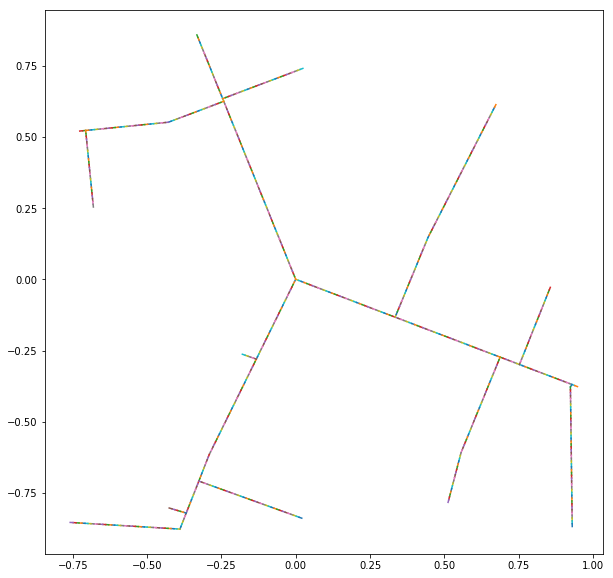

In [45]:
fig = plt.figure(figsize=[10,10])
plt.plot(visual[0],visual[1])
print(visual.shape)